# 机器学习工程师纳米学位
## 强化学习
## 项目 4: 训练智能出租车学会驾驶

欢迎来到机器学习工程师纳米学位的第四个项目！在这个notebook文件中，模板代码已经提供给你，有助于你对*智能出租车*的分析和实现学习算法。你无须改动已包含的代码，除非另有要求。 你需要回答notebook文件中给出的与项目或可视化相关的问题。每一个你要回答的问题前都会冠以**'问题 X'**。仔细阅读每个问题，并在后面**'回答'**文本框内给出完整的回答。你提交的项目会根据你对于每个问题的回答以及提交的`agent.py`的实现来进行评分。 

>**提示：** Code 和 Markdown 单元格可通过 **Shift + Enter** 快捷键来执行。此外，Markdown可以通过双击进入编辑模式。

-----

## 开始
在这个项目中，你将构建一个优化的Q-Learning驾驶代理程序，它会操纵*智能出租车* 通过它的周边环境到达目的地。因为人们期望*智能出租车*要将乘客从一个地方载到另一个地方，驾驶代理程序会以两个非常重要的指标来评价：**安全性**和**可靠性**。驾驶代理程序在红灯亮时仍然让*智能出租车*行驶往目的地或者勉强避开事故会被认为是**不安全**的。类似的，驾驶代理程序频繁地不能适时地到达目的地会被认为**不可靠**。最大化驾驶代理程序的**安全性**和**可靠性**保证了*智能出租车*会在交通行业获得长期的地位。

**安全性**和**可靠性**用字母等级来评估，如下：

| 等级 	| 安全性 	| 可靠性 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	| 代理程序没有任何妨害交通的行为，<br/>并且总是能选择正确的行动。| 代理程序在合理时间内到达目的地的次数<br />占行驶次数的100%。 |
|   A   	| 代理程序有很少的轻微妨害交通的行为，<br/>如绿灯时未能移动。| 代理程序在合理时间内到达目的地的次数<br />占行驶次数的90%。 |
|   B   	| 代理程序频繁地有轻微妨害交通行为，<br/>如绿灯时未能移动。| 代理程序在合理时间内到达目的地的次数<br />占行驶次数的80%。 |
|   C   	| 代理程序有至少一次重大的妨害交通行为，<br/>如闯红灯。| 代理程序在合理时间内到达目的地的次数<br />占行驶次数的70%。 |
|   D   	| 代理程序造成了至少一次轻微事故，<br/>如绿灯时在对面有车辆情况下左转。	| 代理程序在合理时间内到达目的地的次数<br />占行驶次数的60%。 |
|   F   	| 代理程序造成了至少一次重大事故，<br/>如有交叉车流时闯红灯。	| 代理程序在合理时间内到达目的地的次数<br />未能达到行驶次数的60%。 |

为了协助评估这些重要的指标，你会需要加载可视化模块的代码，会在之后的项目中用到。运行下面的代码格来导入这个代码，你的分析中会需要它。

In [1]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### 了解世界
在开始实现你的驾驶代理程序前，首先需要了解*智能出租车*和驾驶代理程序运行的这个世界（环境）。构建自我学习的代理程序重要的组成部分之一就是了解代理程序的特征，包括代理程序如何运作。原样直接运行`agent.py`代理程序的代码，不需要做任何额外的修改。让结果模拟运行一段时间，以观察各个不同的工作模块。注意在可视化模拟程序（如果启用了），**白色车辆**就是*智能出租车*。

### 问题 1
用几句话，描述在运行默认的`agent.py`代理程序中，你在模拟程序里观察到了什么。一些你可以考虑的情况：
- *在模拟过程中，智能出租车究竟移动了吗？*
- *驾驶代理程序获得了什么样的奖励？*
- *交通灯的颜色改变是如何影响奖励的？*

**提示：** 从顶层的`/smartcab/`目录（这个notebook所在的地方），运行命令
```bash
'python smartcab/agent.py'
```

**回答：**

* 每一次启动智能出租车的位置是随机的，并且智能出租车是静止不动的。


* 驾驶代理程序根据其状态和行为获得了正值和负值的奖励。


* 当交通灯是红灯时，如果智能出租车停止不动则获得正值奖励；当交通灯是绿色时，如有迎面车流，停止不动智能出租车获得正值奖励；当交通灯是绿色时，如没有迎面车流，停止不动智能出租车获得负值奖励。（因智能出租车是静止不动的，所以只能看出此3种静止下的状况。）

### 理解代码
除了要了解世界之外，还需要理解掌管世界、模拟程序等等如何运作的代码本身。如果一点也不去探索一下*“隐藏”*的器件，就试着去创建一个驾驶代理程序会很难。在顶层的`/smartcab/`的目录下，有两个文件夹：`/logs/` （之后会用到）和`/smartcab/`。打开`/smartcab/`文件夹，探索每个下面的Python文件，然后回答下面的问题。

### 问题 2
- *在*`agent.py`* Python文件里，选择 3 个可以设定的 flag，并描述他们如何改变模拟程序的。*
- *在*`environment.py`* Python文件里，当代理程序执行一个行动时，调用哪个Environment类的函数？*
- *在*`simulator.py`* Python 文件里，*`'render_text()'`*函数和*`'render()'`*函数之间的区别是什么?*
- *在*`planner.py`* Python文件里，*`'next_waypoint()`* 函数会先考虑南北方向还是东西方向?*

**回答：**

* 1.在*`agent.py`* Python文件里的**run()**函数中可以设置不同的flag，以下选取3种加以描述:
    - **grid_size**: 设置运行环境中交叉路口的数量（离散值，列行排列），默认值是(8, 6)，即6行8列。
    - **learning**: 设置运行环境中智能出租车是否使用Q-learning，如果设置为True，则强制智能出租车使用Q-learning。
    - **display**: 在PyGame启动时设置为Fasle能关闭GUI（图形用户界面）。默认设置为True。<br/><br/>
    

* 2.在*`environment.py`* Python文件里，当代理程序执行一个行动时，调用的是**class Environmen**类中**act()**函数。<br/><br/>


* 3.在*`simulator.py`* Python文件里，*`'render_text()'`*函数和*`'render()'`*函数之间的区别如下：
     - **render_text()函数**: 以非图形化的方式显示试验数据，即在终端/命令行 显示智能出租车的行为、奖励和状态等。
     - **render()函数**: 以图形界面的方式显示试验数据，即用GUI方式 显示智能出租车的行为、奖励和状态等，同时还具有绘制环境中相关对象功能。<br/><br/>
     
     
* 4.在*`planner.py`* Python文件里，*`'next_waypoint()`* 函数会先考虑**东西方向**。

-----
## 实现一个基本的驾驶代理程序

创建一个优化Q-Learning的驾驶代理程序的第一步，是让代理程序确实地执行有效的行动。在这个情况下，一个有效的行动是`None`（不做任何行动）、`'Left'`（左转）、`'Right'`（右转）或者`'Forward'`（前进）。作为你的第一个实现，到`'choose_action()'`代理程序函数，使驾驶代理程序随机选择其中的一个动作。注意你会访问到几个类的成员变量，它们有助于你编写这个功能，比如`'self.learning'`和`'self.valid_actions'`。实现后，运行几次代理程序文件和模拟程序来确认你的驾驶代理程序每步都执行随机的动作。

### 基本代理程序模拟结果
要从最初的模拟程序获得结果，你需要调整下面的标志：
- `'enforce_deadline'` - 将此标志设定为`True`来强制驾驶代理程序捕获它是否在合理时间内到达目的地。
- `'update_delay'` - 将此标志设定为较小数值（比如`0.01`）来减少每次试验中每步之间的时间。
- `'log_metrics'` - 将此标志设定为`True`将模拟结果记录为在`/logs/`目录下的`.csv`文件。
- `'n_test'` - 将此标志设定为`'10'`则执行10次测试试验。

可选的，你还可以通过将`'display'`标志设定为`False`来禁用可视化模拟（可以使得试验跑得更快）。调试时，设定的标志会返回到他们的默认设定。重要的是要理解每个标志以及它们如何影响到模拟。

你成功完成了最初的模拟后（有20个训练试验和10个测试试验），运行下面的代码单元格来使结果可视化。注意运行同样的模拟时，日志文件会被覆写，所以留意被载入的日志文件！在 projects/smartcab 下运行 agent.py 文件。

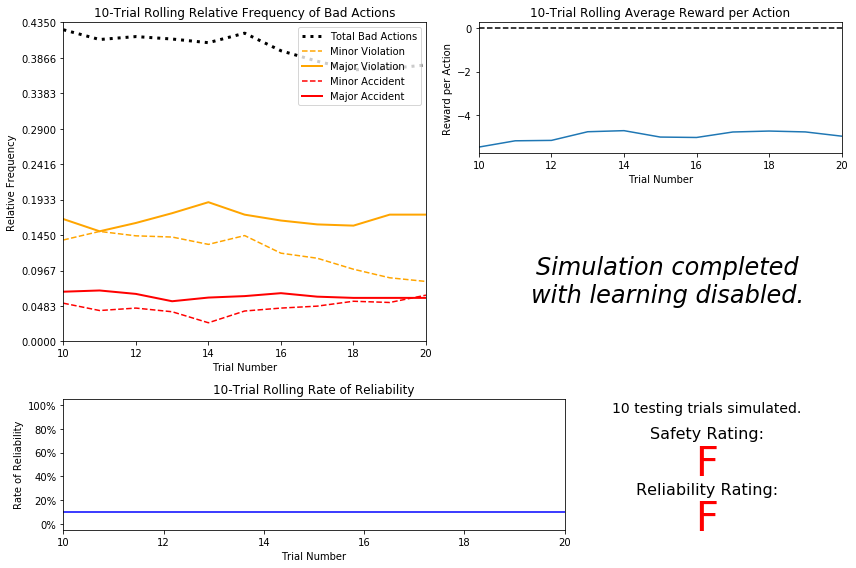

In [2]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### 问题 3
利用上面的从你初始模拟中得到的可视化结果，给出关于驾驶代理程序的分析和若干观察。确保对于可视化结果上的每个面板你至少给出一条观察结果。你可以考虑的一些情况：
- *驾驶代理程序多频繁地做出不良决策？有多少不良决策造成了事故？*
- *假定代理程序是随机驾驶，那么可靠率是否合理？*
- *代理程序对于它的行动会获得什么样的奖励？奖励是否表明了它收到严重的惩罚？*
- *随着试验数增加，结果输出是否有重大变化？*
- *这个智能出租车对于乘客来说，会被人为是安全的且/或可靠的吗？为什么或者为什么不？*

**答案：**
* 从左上方第一幅图（"10-Trial Rolling Relative Frequency of Bad Actions"）可以看出，驾驶代理在相对频率为0.4（40%）左右做出不良决策。造成大型事故（"Major Accident"）的相对频率在0.06（6%）左右。


* 从下方第三幅图（“10-Trial Rolling Rate of Reliability”）可以看出可靠率很低，假定代理程序随机驾驶，从行驶状况和环境考虑，这么低的可靠性是合理的。


* 从右上方第二幅图（"10-Trial Rolling Average Reward Action"）可以看出代理程序基本上获得的是负值奖励，它表明了驾驶代理因为不良决策和低可靠性受到了惩罚。


* 综合三幅图可以看出，随着试验数增加，结果输出有一定小幅度波动，但并没有重大变化。


* 这个智能出租车对于乘客来说，综合三幅图从其决策和可靠性来看，对人是不安全的。因为这个智能出租车是随机驾驶，如果是在真实的驾驶环境中，考虑到环境的复杂性，从其模拟的数据中可以推测其必会常做出不良决策，从而导致事故出现的可能性增加。

-----
## 通知驾驶代理程序
创建一个优化Q-Learning的驾驶代理程序的第二步，是定义一系列代理程序会在环境中发生的状态。根据输入、感知数据和驾驶代理程序可用的变量，可以为代理程序定义一系列状态，使它最终可以*学习*在一个状态下它需要执行哪个动作。对于每个状态的`'如果这个处于这个状态就那个行动'`的状况称为**策略**，就是最终驾驶代理程序要学习的。没有定义状态，驾驶代理程序就不会明白哪个动作是最优的——或者甚至不会明白它要关注哪个环境变量和条件！

### 识别状态
查看`'build_state()'`代理程序函数，它显示驾驶代理函数可以从环境中获得下列数据：
- `'waypoint'`，*智能出租车*去向目的地应该行驶的方向，它是*智能出租车*车头方向的相对值。
- `'inputs'`，*智能出租车*的感知器数据。它包括  
  - `'light'`，交通灯颜色。
  - `'left'`，*智能出租车*左侧车辆的目的方向。如果没有车辆，则返回`None`。
  - `'right'`，*智能出租车*右侧车辆的目的方向。如果没有车辆，则返回`None`。
  - `'oncoming'`，*智能出租车*交叉方向车辆的目的方向。如果没有车辆，则返回`None`。
- `'deadline'`，*智能出租车*在时间之内到达目的地还所需的剩余动作数目。

### 问题 4
*代理程序的哪些可用特征与学习**安全性**和**效率**相关性最高？你为什么认为这些特征适合在环境中对**智能出租车**建模？如果你没有选择某些特征，放弃他们的原因是什么？*

**回答：**

* 代理程序与学习**安全性**和**效率性**相关性最高的特征如下:
    - **'waypoint'**:从效率来看，代理程序必须知道去向目的地的方向，才能高效到达目的地，而不是随机低效地寻找目的地。所以适合建模。
    - **'inputs'中的'light'**: 从安全性考虑，代理程序必须遵循红绿灯行驶，这样才能避免发生事故；从效率来看，驾驶代理需要学习通过红绿灯时获得的奖励值，来最优化到达目的地的总得rewards（奖励值）。所以适合在环境中对智能出租车建模。
    - **'inputs'中的'light', 'left', 'oncoming'**: 从安全性出发考虑，这三个特征值包含了驾驶代理周边车辆的行驶状况，这些特征值与驾驶代理是否做出优良决策息息相关，从而影响驾驶代理行驶是否安全；从效率来看，驾驶代理需要学习红绿灯和迎面车流状况获取的奖励值，来最优化代理驾驶的行动。所以这些特征适合在环境中对智能出租车建模。<br/><br/>
    
    
* 我考虑放弃特征为'deadline'，理由如下:
    - 从安全性考虑，智能出租车在时间之内到达目的地还所需的剩余动作数目与驾驶代理是否行驶安全相关性并不高，如果用这个特征建模还可能增加事故发生概率，减小安全性。
    - 从效率来看，'deadline'确实能使得代理程序更高效，但是如果包含这个特征会使得状态空间过大（'deadline'状态太多），从而使得代理程序对某些状态无法学到如何决策。同时代理程序可以自己通过奖励值和'waypoint'，建立Q table学习到如何到达目的地。所以放弃'deadline'特征有利于减小状态空间，减小Q table大小，使得算法效率更高。

### 定义状态空间
当定义一系列代理程序会处于的状态，必需考虑状态空间的*大小*。就是说，如果你期望驾驶代理程序针对每个状态都学习一个**策略**，你会需要对于每一个代理状态都有一个最优的动作。如果所有可能状态的数量非常大，最后会变成这样的状况，驾驶代理程序对于某些状态学不到如何行动，会导致未学习过的决策。例如，考虑用下面的特征定义*智能出租车*的状态的情况：

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.
发生如`(False, True, True, True, False, False, '3AM')`的状态的频次如何？没有近乎无限数量的训练，很怀疑代理程序会学到一个合适的动作！

### 问题 5
*如果用你在**问题4**中选择的特征来定义一个状态，状态空间的大小是多少？假定你了解环境以及它是如何模拟的，你觉得经过合理数量的训练之后，代理驾驶能学到一个较好的策略吗？（遇见绝大部分状态都能作出正确决策。）*
**提示：** 考虑特征*组合*来计算状态的总数！

**回答：**

* 1.**'waypoint'**:由*`planner.py`* Python文件里，*`next_waypoint()`* 函数（代码35-76行）可知，**waypoint**状态为3种：forward, left, right。


* 2.**'inputs'**:由*`environment.py`* Python文件里，类*`class TrafficLight`* （代码11行）可知，**light**状态为2种：True = NS open; False = EW open；类*`class Environment`* （代码30,31行）可知，**left, right, oncoming**状态都为4种：[None, 'forward', 'left', 'right']。


* **结论**：因为状态之间相互独立，所以状态空间大小为: 3x2x4x4x4 = 384。

### 更新驾驶代理程序的状态
要完成你的第二个实现，去到`'build_state()'`代理程序函数。根据你在**问题4**给出的判断，你现在要将`'state'`变量设定为包含所有Q-Learning所需特征的元组。确认你的驾驶代理程序通过运行代理程序文件和模拟会更新它的状态，注意状态是否显示了。如果用了可视化模拟，确认更新的状态和在模拟程序里看到的一致。

**注意：** 观察时记住重置模拟程序的标志到默认设定！

-----
## 实现Q-Learning驾驶代理程序
创建一个优化Q-Learning的驾驶代理程序的第三步，是开始实现Q-Learning自身的功能。Q-Learning的概念相当直接：每个访问的状态，为所有可用的状态-行动配对在Q-table里创建一条记录。然后，当代理程序遇到一个状态并执行了一个动作，基于获得的奖励和设定的相互的更新规则，来更新关联的状态-动作配对的Q-value。当然，Q-Learning还带来其他的收益，如此我们可以让代理程序根据每个可能的状态-动作配对的Q-values，来为每个状态选择*最佳*动作。在这个项目里，你会实现一个*衰减* $\epsilon$ *-贪心* 的Q-learning算法，不含折扣因子。遵从每个代理程序函数的**TODO**下的实现指导。

注意代理程序的属性`self.Q`是一个字典：这就是Q-table的构成。每个状态是`self.Q`字典的键，每个值是另一个字典，包含了*action*和*Q-value*。这里是个样例：

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

此外，注意你要求利用一个*衰减*$\epsilon$*（探索）因子*。因此，随着试验的增加，$\epsilon$会向0减小。这是因为，代理程序会从它的行为中学习，然后根据习得的行为行动。而且当$\epsilon$达到特定阈值后（默认阈值为0.01），代理程序被以它所学到的东西来作检测。作为初始的Q-Learning实现，你将实现一个线性衰减$\epsilon$的函数。

### Q-Learning模拟结果
要从最初的Q-learning程序获得结果，你需要调整下面的标志和设置：
- `'enforce_deadline'` - 将此标志设定为`True`来强制驾驶代理程序捕获它是否在合理时间内到达目的地。
- `'update_delay'` - 将此标志设定为较小数值（比如`0.01`）来减少每次试验中每步之间的时间。
- `'log_metrics'` - 将此标志设定为`True`将模拟结果记录为在`/logs/`目录下的`.csv`文件，Q-table存为`.txt`文件。
- `'n_test'` - 将此标志设定为`'10'`则执行10次测试试验。
- `'learning'` - 将此标志设定为`'True'`来告诉驾驶代理使用你的Q-Learning实现。

此外，使用下面的$\epsilon$衰减函数：

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

如果你在实施时遇到困难，尝试把`'verbose'`标志设为`True`来调试。调试时，在这里设定的标志会返回到它们的默认设定。重要的是你要理解每个标志做什么并且解释它们怎么影响模拟！

当你成功完成初始的Q-Learning模拟程序后，运行下面代码单元格来使结果可视化。注意当相同的模拟运行时，log文件会被覆写，所以要留意载入的log文件！

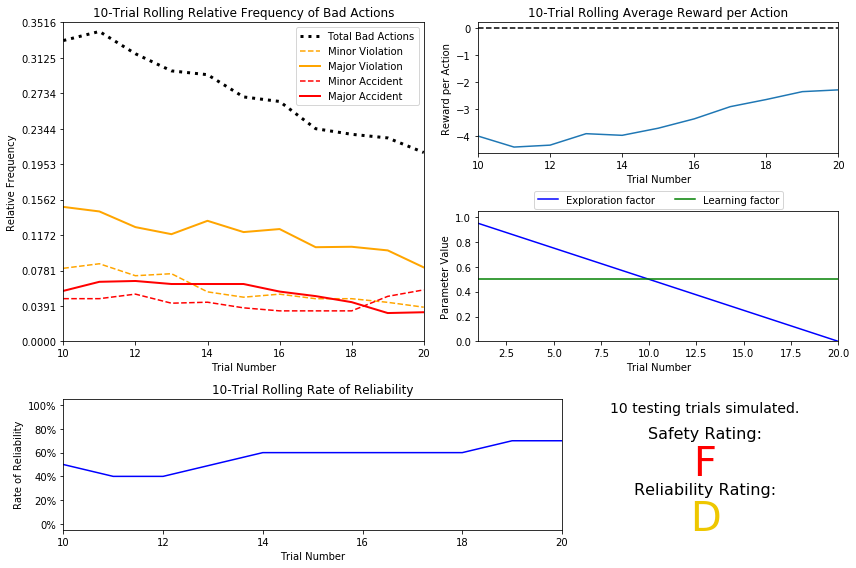

In [3]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### 问题 6
利用上面的从你默认的Q-Learning模拟中得到的可视化结果，像在**问题3**那样，给出关于驾驶代理程序的分析和若干观察。注意模拟程序应该也产生了Q-table存在一个文本文件中，可以帮到你观察代理程序的算法。你可以考虑的一些情况：
- *有没有观察到基本驾驶代理程序和默认的Q-Learning代理程序的相似之处？*
- *在测试之前驾驶代理大约需要做多少训练试验？在给定的$\epsilon$ 容忍度下，这个数字是否合理？*
- *你实现的$\epsilon$（探索因子）衰减函数是否准确地在参数面板中显示？*
- *随着试验数增加，不良动作的数目是否减少?平均奖励是否增加？*
- *与初始的驾驶代理程序相比，安全性和可靠性评分怎样？*

**回答：**

* 通过前面两幅图的对比，基本驾驶代理程序和默认的Q-Learning代理程序在最终得分"Safety Rating"上都为F。此外所有的结果在"Frequency of Bad Action","Average Reward per Action", "Rate of Reliability"上都没有相似之处。基本驾驶代理程序相对于默认的Q-Learning代理程序开始学习，各方面都有所提升（不良动作评分降低，平均奖励增加，相对可靠性频率百分比增加）。


* 从日志文件可以看出， 测试之前驾驶代理需要做20次训练试验。如果从这里设定的$\epsilon$每次减少0.05来看，从初始的1经过20次刚好减为0，低于特定阈值0.05，代理程序开始以它所学到的东西来作检测，所以是合理的；但从整体效果出发，"Frequency of Bad Action"的得分还在继续降低,"Average Reward per Action"的得分还在升高, "Rate of Reliability"得分还在提升，训练就因$\epsilon$到达阈值结束，所以训练次数还是太少。从这个角度来说，$\epsilon$和tolerance设定值不合理。


* 从上面输出的图表（"10-Trial Rolling Average Reward Action"下面的图）可以看出，实现的$\epsilon$（探索因子）衰减函数准确地在参数面板中显示了。


* 从左上方第一幅图（"10-Trial Rolling Relative Frequency of Bad Actions"）可以看出随着试验数增加，不良动作的数目逐渐减少；从右上方第二幅图（"10-Trial Rolling Average Reward Action"）可以看出，平均奖励逐渐增加。


* 与初始的驾驶代理程序相比，安全性评分没有变化（都为F），可靠性评分有所提升（从F提升为D。PS:后多次测试试验发现可靠性评分并不稳定）。

-----
## 改进Q-Learning驾驶代理程序
创建一个优化Q-Learning的驾驶代理程序的第三步，是执行优化！现在Q-Learning算法已经实现并且驾驶代理程序已经成功学习了，需要调整设定、调节参数让驾驶代理程序学习**安全性**和**效率**。通常这一步需要很多试验和错误，因为某些设定必定会造成更糟糕的学习。要记住的一件事是学习的行为本身和需要的时间：理论上，我们可以允许代理程序用非常非常长的时间来学习；然而，Q-Learning另一个目的是*将没有习得行为的试验试验变为有习得行为的行动*。例如，训练中总让代理程序执行随机动作（如果$\epsilon = 1$并且永不衰减）当然可以使它*学习*，但是不会让它*行动*。当改进你的Q-Learning实现时，要考虑做一个特定的调整的意义，以及它是否逻辑上是否合理。

### 改进Q-Learning的模拟结果
要从最初的Q-learning程序获得结果，你需要调整下面的标志和设置：
- `'enforce_deadline'` - 将此标志设定为`True`来强制驾驶代理程序捕获它是否在合理时间内到达目的地。
- `'update_delay'` - 将此标志设定为较小数值（比如`0.01`）来减少每次试验中每步之间的时间。
- `'log_metrics'` - 将此标志设定为`True`将模拟结果记录为在`/logs/`目录下的`.csv`文件，Q-table存为`.txt`文件。
- `'learning'` - 将此标志设定为`'True'`来告诉驾驶代理使用你的Q-Learning实现。
- `'optimized'` - 将此标志设定为`'True'`来告诉驾驶代理你在执行一个优化版本的Q-Learning实现。

优化Q-Learning代理程序可以调整的额外的标志：
- `'n_test'` - 将此标志设定为某个正数（之前是10）来执行那么多次测试试验。
- `'alpha'` - 将此标志设定为0 - 1之间的实数来调整Q-Learning算法的学习率。
- `'epsilon'` - 将此标志设定为0 - 1之间的实数来调整Q-Learning算法的起始探索因子。
- `'tolerance'` - 将此标志设定为某个较小的大于0的值（默认是0.05）来设定测试的epsilon阈值。

此外，使用一个你选择的$\epsilon$ (探索因子)衰减函数。注意无论你用哪个函数，**一定要以合理的速率衰减**到`'tolerance'`。Q-Learning代理程序到此才可以开始测试。某个衰减函数的例子($t$是试验的数目)：

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$

如果你想的话，你也可以使用$\alpha$ （学习率） 的衰减函数，当然这通常比较少见。如果你这么做了，确保它满足不等式$0 \leq \alpha \leq 1$。
如果你在实施时遇到困难，尝试把`'verbose'`标志设为`True`来调试。调试时，在这里设定的标志会返回到它们的默认设定。重要的是你要理解每个标志做什么并且解释它们怎么影响模拟！

当你成功完成初始的Q-Learning模拟程序后，运行下面代码单元格来使结果可视化，请注意为了达到项目要求你需要在安全性和可靠性上获得至少都为A的评分。注意当相同的模拟运行时，log文件会被覆写，所以要留意载入的log文件！

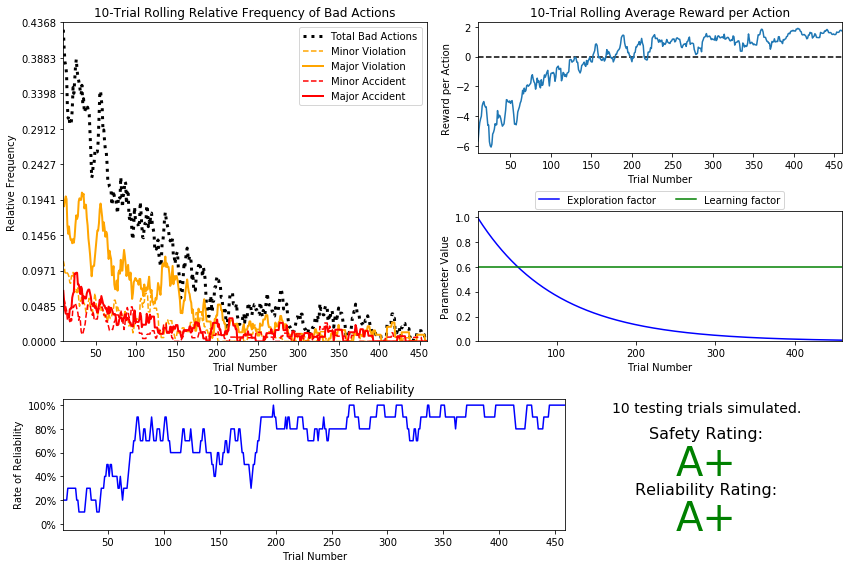

In [4]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### 问题7
利用上面的从你改进的Q-Learning模拟中得到的可视化结果，像在**问题6**那样，给出关于改进的驾驶代理程序的最终分析和观察。你需要回答的问题：
- *使用了什么epsilon（探索因子）的衰减函数？*
- *在测试之前驾驶代理大约需要做多少训练试验？*
- *你用了什么epsilon-tolerance和alpha（学习率）值？为什么？*
- *与之前的默认Q-Learning学习器相比，这个Q-Learning学习器有多少改进？ *
- *你会说Q-Learning学习器的结果表明了你的驾驶代理程序成功地学习了一个合适的策略吗？*
- *你对*智能出租车*的安全性和可靠性评分满意吗？*

**回答：**
* 使用了 $ \epsilon = a^t, \textrm{for } 0 < a < 1$的衰减函数（在程序中a设定为0.99）。


* 在测试之前驾驶代理大约需要做450次训练试验。


* epsilon-tolerance和alpha（学习率）值分别设定为0.01和0.6，目的是要通过减小epsilon-tolerance来增加驾驶代理的训练次数，从而经过学习达到更好的可靠性和安全性。alpha（学习率）从0.5调整为0.6目的是Q-table值更快收敛（提高学习速度），改善驾驶代理的可靠性。


* 与之前的默认Q-Learning学习器相比，这个Q-Learning学习器从各方面都得到大幅改进与提升（"Bad Actions频率"分数降到接近0，"Reward per Action"分数提高到正值2左右，"Rate of Reliability"提升到80%-100%），可靠性和安全性评分都达到了A+。


* 从上图和输出的日志文件可以判断驾驶代理程序成功地学习了一个合适的策略。


* 经过几次试验，评分基本稳定，虽然训练次数较多，但最终各图输出结果和最终评分还是比较满意。


* 参考资料：
    - [P4完成心得及论坛p4资料整理](http://discussions.youdaxue.com/t/p4/41725)
    - [A Painless Q-learning Tutorial (一个 Q-learning 算法的简明教程)](http://blog.csdn.net/pi9nc/article/details/27649323)
    - [P4回报社会——从双f到双a+](https://discussions.youdaxue.com/t/p4-f-a/25533)
    - [Safety A+ and Reliability F - help please](https://discussions.udacity.com/t/safety-a-and-reliability-f-help-please/219133)
    - [[完成 P4回报社会，更新Q matrix的两种方案（不涉及作业剧透）](https://discussions.youdaxue.com/t/deprecated-p4-q-matrix/3938)
    - [Why state changes within the self.update() run?](https://discussions.udacity.com/t/why-state-changes-within-the-self-update-run/164707/3)
    - goolge,baidu搜索未列出

### 定义一个最优策略

有时，对于重要的问题*“我要让我的代理程序学习什么？”*的答案，只是理论性的，无法具体描述。然而这里，你可以具体定义代理程序要学什么，就是美国通行权交通法案。这些法律是已知信息，你可以基于这些法律，为*智能出租车*进一步定义每一个状态所做的最优动作。在那种情况下，我们称这一系列最优状态-动作配对为**最优策略**。因此，不像那些理论性的回答，不仅通过收到的奖励（惩罚），而且纯观察，代理程序是否在“错误”地行动能很清晰地得知。如果代理程序闯了红灯，我们既看见它获得了一个负面奖励，也知道这是一个错误的行为。这可以用来帮你验证驾驶代理程序习得的**策略**是否正确，或只是个**次优策略**。

### 问题 8
给出几个关于最优策略是什么样子的例子（用你已定义的状态）。之后，查看`'sim_improved-learning.txt'`文本文件，看你的改进的Q-Learning算法的结果。_每个从模拟中纪录的状态，对于给定的状态，**策略**（得分最高的动作）是否正确？是否对于有些状态，有策略不同于预期的最优策略？_给出一个状态和记录的状态-动作的奖励，解释为什么正是个正确的策略。

**回答：** （修改）：


* 根据前面“定义一个最优策略”的描述，为智能出租车定义每一个状态所做的最优动作。我们称这一系列最优状态-动作配对为最优策略。在这里，如果小车每一步都是最优动作，当然可以最高效到达目的地（这就类似于下棋的目的是要赢。赢棋是需要一步一步根据棋局，随机应变，做出应对。如果每一步都很高效，棋就不仅会赢，而且会赢得快，赢得多。），在智能车的训练中，不出事故，仅仅保证每一步走对是不够的，需要有“大局观”，在不同状态中找出能达到目的地（获胜）概率最大的最优动作，使得累积的奖励值最大化，才能算得上是“智能车”。


* 根据定义的五个状态 state (waypoint, light, left, right, oncoming)空间，对最优策略的定义如下：
    - 当'light'是红灯（'red'）时,分两种情况：一是‘waypoint’为'right'时，当且仅当其他车流没有占据智能车右边空间时，智能车能右转（如迎面车流左转，左方车右转，为防止车辆相撞，智能车不能有动作。而右方车不影响智能车。PS:后经过查询，在美国交通中发现右方车并不会影响智能车右转，这类似于我国交通中，右转时汽车一般都在最右行车道，右方车没有干扰。这意味着智能车学会了右转规则）；二是除第一种情况外，智能车都必须停在红灯前，不能有所动作（这时在红灯时有所动作，将遭受负值惩罚，这意味着智能车学习到基本交通规则）。
    - 当'light'是绿灯（'green'）时，智能车根据'waypoint'行动。但这时智能车还应该学会避免发生碰撞：比如如果智能车需左转时，对面有迎面车流右转或直行，为防止车辆相撞，智能车需等待直到迎面车流通过后再行动（这时迎面车流如果左转，因为和智能车是去向不同方向，则智能车不受影响）。如果智能车左转，将会受到负值惩罚。
    

* 查看'sim_improved-learning.txt'文本文件，发现并不是所有学习到的策略和我们定义的最优策略是一致的。



* 一致的策略Q_value例子如下：
     - **1.**(('right', 'red', None, 'left', 'left')  -- forward : -5.49 -- right : 0.00 -- None : 1.64 -- left : -8.92： 当'waypoint'指示智能车右转时，此时交通灯为红灯，左方没有车辆，右方车右转不影响，迎面车左转。根据最优策略，此时智能车不能右转，需停止等待。可以看出，驾驶代理得到的奖励值为None：1.64最优，和最优策略一致。
     - **2.**(('forward', 'red', 'forward', None, 'right')  -- forward :-36.99-- right : 0.00 -- None : 1.54 -- left :-33.12： 当'waypoint'指示智能车直行时，此时交通灯为红灯，不论其他车流动作如何，根据最优策略，此时智能车需停止等待。可以看出，驾驶代理得到的奖励值为None：1.54最优，和最优策略一致。
     - **3.**('left', 'green', None, None, 'left')  -- forward :-0.30-- right : 0.77 -- None : 0.88 -- left :1.87： 当'waypoint'指示智能车左转时，此时交通灯为绿灯，左方和右方没有车辆，迎面车左转，根据最优策略，此时智能车和迎面车去向不同方向，左转不受影响。可以看出，驾驶代理得到的奖励值为left：1.87最优，和最优策略一致。
      
      
* 不同于预期的策略Q_value例子如下：
     - **1.**('left', 'red', 'forward', 'right', 'right') -- forward : 0.00 -- right : 0.00 -- None : 0.00 -- left :  -23.59： 当'waypoint'指示智能车左转时，此时交通灯为红灯，左方车直行，右方车右转，迎面车右转。根据最优策略，此时智能车需停止等待。可以看出，驾驶代理得到的奖励值为三个最优但都是0.0。这时按照最优策略应该None为正值，其余为负值。造成此原因是智能车并没有经过充分探索，遇到其它受惩罚的情况，只学习到次优策略。
     - **2.**('forward', 'green', 'right', 'left', 'left') -- forward : 0.00 -- right : 0.00 -- None : 0.00 -- left :  0.07： 当'waypoint'指示智能车直行，此时交通灯为绿色，左方车右转，右方车左转，迎面车左转。根据最优策略，此时智能车需直行。可以看出，驾驶代理得到的奖励值为最优为left:0.07。这时按照最优策略应forward为最大值（按照直行车优先于转向车原则）。造成此原因是智能车并没有充分探索，学习到此状态相应动作反馈，智能车按照随机行动选取了动作。
     
     
* 结论：从上面Q_value值和最优策略对比来看，并查询'sim_improved-learning.txt'后，发现智能车大部分选取动作基本上是和最优策略一致的，不同的一些值是因为智能车没有探索到此状态下的各个动作的奖励值引起的。同时也可以看到，在闯红灯和发生碰撞时，智能车受到很大的负值惩罚，并且大多数状态下动作都是有正负值的，说明智能车学习到了不同状态所做动作的反馈。

    但是，虽然在此项目中我们以较大的$ \epsilon $概率1开始（以每次0.99衰减），随机值小于$ \epsilon $（以$ \epsilon $概率）进行探索，大于等于$ \epsilon $进行应用，但还是有一些状态的动作奖励值没有探索到，说明在面对“探索-利用困境“，使用$ \epsilon $贪心算法来进行折中处理时，我们还可以进一步优化（比如，进一步增加训练次数，让探索和应用次数都增加等等）。

-----
### 选做：未来奖励 - 折扣因子 `'gamma'`
也许你会好奇，作为Q-Learning算法的一部分，之前要求你在实现中**不要**使用折扣引子`'gamma'`。在算法中包含未来奖励能有助于在未来状态回溯到当前状态时的反向正面奖励。本质上，如果给予驾驶代理程序执行若干动作到达不同状态的选择，包含未来奖励会是代理程序偏向可以得到更多奖励的状态。一个例子是驶向目的的驾驶代理程序：所有行动和奖励都相等，那么理论上如果到达目的地会有额外奖励，驶向目的会获得更好的奖励。然而，即使在这个项目里，驾驶代理程序也要在规定的时间里到达目的地，包含未来奖励不会有益于代理程序。实际上，如果代理程序给予多次试验学习，它甚至会给Q-value带来负面影响！

### 可选问题 9
*在项目中有两个特点使得未来奖励在这个Q-Learning算法无效。一个特点是关于*智能出租车*本身，另一个是关于环境。你能指出它们是什么以及为什么未来奖励不会在这个项目中起效？*

**回答：**

* 从智能出租车本身来看，'waypoint'特征已经能优化智能出租车尽快到达目的地，所以并不需要加入未来奖励来使智能出租车尽快到达目的地。同时，智能出租车无法从当前五个状态推算出到达目的地的具体距离（没有设定grid坐标），无法感知离目的地距离最近的下一个状态，则未来奖励无法反馈。


* 从环境来看，因为每次训练开始时，智能车位置和目的地都是随机的，如果引入未来奖励，而每次训练环境都不一样，则之前训练的经验（以Q-table存储）则会误导智能出租车，可能出现给予多次试验学习后，反而会给Q-value带来负面影响！所以未来奖励不会在这个项目中起效。

> **注意**:当你写完了所有的代码，并且回答了所有的问题。你就可以把你的 iPython Notebook 导出成 HTML 文件。你可以在菜单栏，这样导出**File -> Download as -> HTML (.html)**把这个 HTML 和这个 iPython notebook 一起做为你的作业提交。